In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [2]:
climatology_path = '/mnt/qb/goswami/data/era5/weatherbench2/1990-2019_6h_1440x721.zarr'
clim = xr.open_zarr(climatology_path)

In [3]:
obs = xr.open_dataset("/mnt/qb/goswami/data/era5/weatherbench2/1959-2023_01_10-wb13-6h-1440x721_with_derived_variables.zarr")

/opt/conda/envs/model/lib/python3.11/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/opt/conda/envs/model/lib/python3.11/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


In [5]:
rh = xr.open_dataset("/mnt/qb/goswami/data/era5/relative_humidity_1979_to_2018.zarr")

/opt/conda/envs/model/lib/python3.11/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/opt/conda/envs/model/lib/python3.11/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


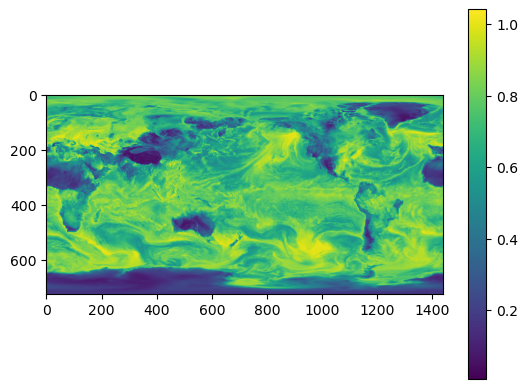

In [59]:
plt.imshow(x)
plt.colorbar()

In [22]:
# sfno = xr.open_zarr("/mnt/qb/work2/goswami0/gkd965/checkpoints/sfno/forecast_lead_time=112_time=2016-2018-shuffled.zarr")
sfno = xr.open_zarr("/mnt/qb/work2/goswami0/gkd965/checkpoints/sfno/newdata/forecast_weights_lead_time=112_time=2018-2018_shuffled_denormalised.zarr")

In [25]:
print(sfno)


<xarray.Dataset> Size: 15GB
Dimensions:                    (prediction_timedelta: 5, time: 10,
                                latitude: 721, longitude: 1440, level: 13)
Coordinates:
  * latitude                   (latitude) float64 6kB 90.0 89.75 ... -90.0
  * level                      (level) int64 104B 50 100 150 ... 850 925 1000
  * longitude                  (longitude) float64 12kB 0.0 0.25 ... 359.5 359.8
  * prediction_timedelta       (prediction_timedelta) timedelta64[ns] 40B 0 d...
  * time                       (time) datetime64[ns] 80B 2018-01-04T12:00:00 ...
Data variables:
    10m_u_component_of_wind    (prediction_timedelta, time, latitude, longitude) float32 208MB dask.array<chunksize=(1, 1, 721, 1440), meta=np.ndarray>
    10m_v_component_of_wind    (prediction_timedelta, time, latitude, longitude) float32 208MB dask.array<chunksize=(1, 1, 721, 1440), meta=np.ndarray>
    2m_temperature             (prediction_timedelta, time, latitude, longitude) float32 208MB dask.a

In [27]:
15*10

150

In [14]:
print(sfno['relative_humidity'].isel(time=0).to_numpy().shape)
sfno["relative_humidity"].sel(level=300,prediction_timedelta="6hr").isel(time=2).to_numpy()

(5, 13, 721, 1440)


array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

In [22]:
jolly = xr.open_zarr("/mnt/qb/work2/goswami0/gkd965/checkpoints/jolly-blaze-113-sID{13578}/forecast_lead_time=112_steps=300_time=2016-2018-shuffled_denormalised.zarr")
jolly

<xarray.Dataset> Size: 442GB
Dimensions:                    (prediction_timedelta: 5, time: 300,
                                latitude: 721, longitude: 1440, level: 13)
Coordinates:
  * latitude                   (latitude) float64 6kB 90.0 89.75 ... -90.0
  * level                      (level) int64 104B 50 100 150 ... 850 925 1000
  * longitude                  (longitude) float64 12kB 0.0 0.25 ... 359.5 359.8
  * prediction_timedelta       (prediction_timedelta) timedelta64[ns] 40B 0 d...
  * time                       (time) datetime64[ns] 2kB 2016-01-17 ... 2017-...
Data variables:
    10m_u_component_of_wind    (prediction_timedelta, time, latitude, longitude) float32 6GB dask.array<chunksize=(1, 1, 721, 1440), meta=np.ndarray>
    10m_v_component_of_wind    (prediction_timedelta, time, latitude, longitude) float32 6GB dask.array<chunksize=(1, 1, 721, 1440), meta=np.ndarray>
    2m_temperature             (prediction_timedelta, time, latitude, longitude) float32 6GB dask.array<chunksize=(1, 1, 721, 1440), meta=np.ndarray>
    geopotential               (prediction_timedelta, time, level, latitude, longitude) float32 81GB dask.array<chunksize=(1, 1, 13, 721, 1440), meta=np.ndarray>
    mean_sea_level_pressure    (prediction_timedelta, time, latitude, longitude) float32 6GB dask.array<chunksize=(1, 1, 721, 1440), meta=np.ndarray>
    relative_humidity          (prediction_timedelta, time, level, latitude, longitude) float32 81GB dask.array<chunksize=(1, 1, 13, 721, 1440), meta=np.ndarray>
    surface_pressure           (prediction_timedelta, time, latitude, longitude) float32 6GB dask.array<chunksize=(1, 1, 721, 1440), meta=np.ndarray>
    temperature                (prediction_timedelta, time, level, latitude, longitude) float32 81GB dask.array<chunksize=(1, 1, 13, 721, 1440), meta=np.ndarray>
    total_column_water_vapour  (prediction_timedelta, time, latitude, longitude) float32 6GB dask.array<chunksize=(1, 1, 721, 1440), meta=np.ndarray>
    u_component_of_wind        (prediction_timedelta, time, level, latitude, longitude) float32 81GB dask.array<chunksize=(1, 1, 13, 721, 1440), meta=np.ndarray>
    v_component_of_wind        (prediction_timedelta, time, level, latitude, longitude) float32 81GB dask.array<chunksize=(1, 1, 13, 721, 1440), meta=np.ndarray>

In [27]:
microwave = xr.open_zarr("/mnt/qb/work2/goswami0/gkd965/checkpoints/whole-microwave-125-sID{32922}/forecastcheckpoint_sfno_film_mae_iter=0_epoch=1_lead_time=112_steps=200_time=2016-2018-shuffled_denormalised.zarr")

In [28]:
print(microwave)

<xarray.Dataset> Size: 295GB
Dimensions:                    (prediction_timedelta: 5, time: 200,
                                latitude: 721, longitude: 1440, level: 13)
Coordinates:
  * latitude                   (latitude) float64 6kB 90.0 89.75 ... -90.0
  * level                      (level) int64 104B 50 100 150 ... 850 925 1000
  * longitude                  (longitude) float64 12kB 0.0 0.25 ... 359.5 359.8
  * prediction_timedelta       (prediction_timedelta) timedelta64[ns] 40B 0 d...
  * time                       (time) datetime64[ns] 2kB 2016-01-05 ... 2017-...
Data variables:
    10m_u_component_of_wind    (prediction_timedelta, time, latitude, longitude) float32 4GB dask.array<chunksize=(1, 1, 721, 1440), meta=np.ndarray>
    10m_v_component_of_wind    (prediction_timedelta, time, latitude, longitude) float32 4GB dask.array<chunksize=(1, 1, 721, 1440), meta=np.ndarray>
    2m_temperature             (prediction_timedelta, time, latitude, longitude) float32 4GB dask.array

In [23]:
solar = xr.open_zarr("/mnt/qb/work2/goswami0/gkd965/checkpoints/solar-spaceship-111-sID{0005}/forecast_lead_time=84_time=2016-2018_steps=6-shuffled.zarr")
solar

<xarray.Dataset> Size: 7GB
Dimensions:                    (prediction_timedelta: 4, time: 6,
                                latitude: 721, longitude: 1440, level: 13)
Coordinates:
  * latitude                   (latitude) float64 6kB 90.0 89.75 ... -90.0
  * level                      (level) int64 104B 50 100 150 ... 850 925 1000
  * longitude                  (longitude) float64 12kB 0.0 0.25 ... 359.5 359.8
  * prediction_timedelta       (prediction_timedelta) timedelta64[ns] 32B 0 d...
  * time                       (time) datetime64[ns] 48B 2016-04-29T06:00:00 ...
Data variables:
    10m_u_component_of_wind    (prediction_timedelta, time, latitude, longitude) float32 100MB dask.array<chunksize=(1, 1, 721, 1440), meta=np.ndarray>
    10m_v_component_of_wind    (prediction_timedelta, time, latitude, longitude) float32 100MB dask.array<chunksize=(1, 1, 721, 1440), meta=np.ndarray>
    2m_temperature             (prediction_timedelta, time, latitude, longitude) float32 100MB dask.array<chunksize=(1, 1, 721, 1440), meta=np.ndarray>
    geopotential               (prediction_timedelta, time, level, latitude, longitude) float32 1GB dask.array<chunksize=(1, 1, 13, 721, 1440), meta=np.ndarray>
    mean_sea_level_pressure    (prediction_timedelta, time, latitude, longitude) float32 100MB dask.array<chunksize=(1, 1, 721, 1440), meta=np.ndarray>
    relative_humidity          (prediction_timedelta, time, level, latitude, longitude) float32 1GB dask.array<chunksize=(1, 1, 13, 721, 1440), meta=np.ndarray>
    surface_pressure           (prediction_timedelta, time, latitude, longitude) float32 100MB dask.array<chunksize=(1, 1, 721, 1440), meta=np.ndarray>
    temperature                (prediction_timedelta, time, level, latitude, longitude) float32 1GB dask.array<chunksize=(1, 1, 13, 721, 1440), meta=np.ndarray>
    total_column_water_vapour  (prediction_timedelta, time, latitude, longitude) float32 100MB dask.array<chunksize=(1, 1, 721, 1440), meta=np.ndarray>
    u_component_of_wind        (prediction_timedelta, time, level, latitude, longitude) float32 1GB dask.array<chunksize=(1, 1, 13, 721, 1440), meta=np.ndarray>
    v_component_of_wind        (prediction_timedelta, time, level, latitude, longitude) float32 1GB dask.array<chunksize=(1, 1, 13, 721, 1440), meta=np.ndarray>

In [11]:
eval_test = xr.open_dataset("/mnt/qb/work2/goswami0/gkd965/checkpoints/solar-spaceship-111-sID{0005}/eval/forecast_lead_time=84_time=2016-2018-shuffled_evaltest.nc")
eval_test

<xarray.Dataset> Size: 984B
Dimensions:                    (level: 4, lead_time: 4, metric: 3)
Coordinates:
  * level                      (level) int32 16B 300 850 925 1000
  * lead_time                  (lead_time) timedelta64[ns] 32B 0 days 06:00:0...
  * metric                     (metric) object 24B 'acc' 'bias' 'mse'
Data variables:
    geopotential               (metric, lead_time, level) float32 192B ...
    relative_humidity          (metric, lead_time, level) float32 192B ...
    temperature                (metric, lead_time, level) float32 192B ...
    v_component_of_wind        (metric, lead_time, level) float32 192B ...
    2m_temperature             (metric, lead_time) float32 48B ...
    total_column_water_vapour  (metric, lead_time) float32 48B ...
    mean_sea_level_pressure    (metric, lead_time) float32 48B ...

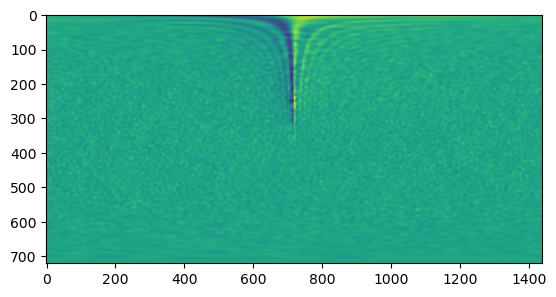

In [21]:
hrs = ["6hr","7days","14days","21days","28days"]
img = sfno["relative_humidity"].sel(level=300,prediction_timedelta="7days").isel(time=2)
plt.imshow(img.to_numpy())
plt.show()
# img.time

<xarray.DataArray 'time' ()> Size: 8B
array('2016-01-17T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    level                 int64 8B 1000
    prediction_timedelta  timedelta64[ns] 8B 7 days
    time                  datetime64[ns] 8B 2016-01-17

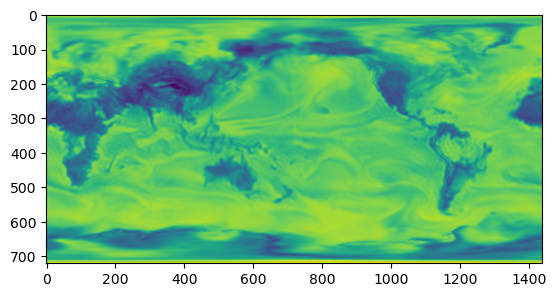

In [42]:
hrs = ["6hr","7days","14days","21days","28days"]
img = jolly["relative_humidity"].sel(level=1000,prediction_timedelta="7days").isel(time=0)
plt.imshow(img.to_numpy())
img.time

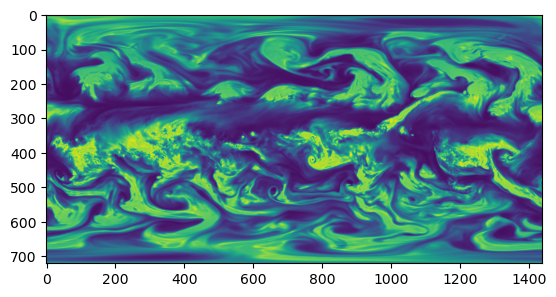

In [51]:
img_obs = obs["relative_humidity"].sel(level=300).sel(time='2016-01-17T00:00')
plt.imshow(img_obs.to_numpy())

In [29]:
def data(i):
    path = [
        [
            '/mnt/qb/work2/goswami0/gkd965/checkpoints/solar-spaceship-111-sID{0005}/forecast_lead_time=84_time=2016-2018-shuffled.zarr',
            '/mnt/qb/work2/goswami0/gkd965/checkpoints/solar-spaceship-111-sID{0005}/eval/forecast_lead_time=84_time=2016-2018-shuffled_evaltest.nc'
        ],[
            '/mnt/qb/work2/goswami0/gkd965/checkpoints/jolly-blaze-113-sID{13578}/forecast_lead_time=112_time=2016-2018-shuffled.zarr',
            '/mnt/qb/work2/goswami0/gkd965/checkpoints/jolly-blaze-113-sID{13578}/eval/forecast_lead_time=112_time=2016-2018-shuffled_eval.nc'
        ]
    ]
    forecast_path, evals_path = path[i]
    forecast = xr.open_zarr(forecast_path)
    evals  = xr.open_dataset(evals_path)
    return forecast, evals
            

In [30]:
forecast, evals = data(1)

In [34]:
forecast

<xarray.Dataset> Size: 265GB
Dimensions:                    (prediction_timedelta: 5, time: 180,
                                latitude: 721, longitude: 1440, level: 13)
Coordinates:
  * latitude                   (latitude) float64 6kB 90.0 89.75 ... -90.0
  * level                      (level) int64 104B 50 100 150 ... 850 925 1000
  * longitude                  (longitude) float64 12kB 0.0 0.25 ... 359.5 359.8
  * prediction_timedelta       (prediction_timedelta) timedelta64[ns] 40B 0 d...
  * time                       (time) datetime64[ns] 1kB 2016-01-01T06:00:00 ...
Data variables:
    10m_u_component_of_wind    (prediction_timedelta, time, latitude, longitude) float32 4GB dask.array<chunksize=(1, 1, 721, 1440), meta=np.ndarray>
    10m_v_component_of_wind    (prediction_timedelta, time, latitude, longitude) float32 4GB dask.array<chunksize=(1, 1, 721, 1440), meta=np.ndarray>
    2m_temperature             (prediction_timedelta, time, latitude, longitude) float32 4GB dask.array<chunksize=(1, 1, 721, 1440), meta=np.ndarray>
    geopotential               (prediction_timedelta, time, level, latitude, longitude) float32 49GB dask.array<chunksize=(1, 1, 13, 721, 1440), meta=np.ndarray>
    mean_sea_level_pressure    (prediction_timedelta, time, latitude, longitude) float32 4GB dask.array<chunksize=(1, 1, 721, 1440), meta=np.ndarray>
    relative_humidity          (prediction_timedelta, time, level, latitude, longitude) float32 49GB dask.array<chunksize=(1, 1, 13, 721, 1440), meta=np.ndarray>
    surface_pressure           (prediction_timedelta, time, latitude, longitude) float32 4GB dask.array<chunksize=(1, 1, 721, 1440), meta=np.ndarray>
    temperature                (prediction_timedelta, time, level, latitude, longitude) float32 49GB dask.array<chunksize=(1, 1, 13, 721, 1440), meta=np.ndarray>
    total_column_water_vapour  (prediction_timedelta, time, latitude, longitude) float32 4GB dask.array<chunksize=(1, 1, 721, 1440), meta=np.ndarray>
    u_component_of_wind        (prediction_timedelta, time, level, latitude, longitude) float32 49GB dask.array<chunksize=(1, 1, 13, 721, 1440), meta=np.ndarray>
    v_component_of_wind        (prediction_timedelta, time, level, latitude, longitude) float32 49GB dask.array<chunksize=(1, 1, 13, 721, 1440), meta=np.ndarray>

In [31]:
evals

<xarray.Dataset> Size: 1kB
Dimensions:                    (lead_time: 5, level: 4, metric: 3)
Coordinates:
  * lead_time                  (lead_time) timedelta64[ns] 40B 0 days 06:00:0...
  * level                      (level) int32 16B 300 850 925 1000
  * metric                     (metric) object 24B 'acc' 'bias' 'mse'
Data variables:
    geopotential               (metric, lead_time, level) float32 240B ...
    relative_humidity          (metric, lead_time, level) float32 240B ...
    temperature                (metric, lead_time, level) float32 240B ...
    v_component_of_wind        (metric, lead_time, level) float32 240B ...
    2m_temperature             (metric, lead_time) float32 60B ...
    total_column_water_vapour  (metric, lead_time) float32 60B ...
    mean_sea_level_pressure    (metric, lead_time) float32 60B ...

In [33]:
evals['2m_temperature'].sel(metric='mse').to_numpy()

array([82893.93 , 82852.   , 82857.125, 82862.79 , 82867.945],
      dtype=float32)

In [35]:
forecast['2m_temperature'].isel(prediction_timedelta=0,time=0).to_numpy()

array([[-0.81697243, -0.81697243, -0.81697243, ..., -0.81697243,
        -0.81697243, -0.81697243],
       [-0.79337794, -0.79294103, -0.7933525 , ..., -0.7942226 ,
        -0.79409003, -0.7935489 ],
       [-0.78844845, -0.7882945 , -0.7882586 , ..., -0.7898249 ,
        -0.78888774, -0.78906894],
       ...,
       [-1.2206126 , -1.2206371 , -1.2201658 , ..., -1.2203125 ,
        -1.2204665 , -1.2203162 ],
       [-1.2011966 , -1.2014477 , -1.2014947 , ..., -1.2015593 ,
        -1.2015358 , -1.2012155 ],
       [-1.2085196 , -1.2085196 , -1.2085196 , ..., -1.2085196 ,
        -1.2085196 , -1.2085196 ]], dtype=float32)

In [18]:
fn = f['2m_temperature'].isel(time=0,prediction_timedelta=0).to_numpy()

In [12]:
f.lead_time.to_numpy().astype('timedelta64[h]')

array([  6, 168, 336, 504], dtype='timedelta64[h]')

In [13]:
f['relative_humidity'].sel(metric='mse').to_numpy()

array([[ 2.0264692,  6.5869803, 13.890411 , 16.213217 ],
       [ 2.2185156,  6.9851036, 11.318614 , 10.151982 ],
       [ 2.260561 ,  7.6156135, 12.0974045, 10.889194 ],
       [ 2.3030612,  7.8895454, 12.572457 , 11.185738 ]], dtype=float32)

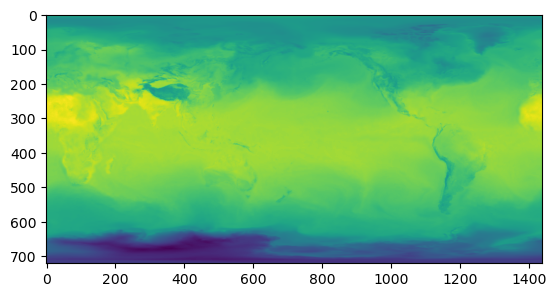

In [21]:
plt.imshow(fn)